In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [24]:
df = pd.read_csv(Path('crypto_data.csv'))

df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [25]:
# Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Once you have done this, drop the `IsTrading` column from the dataframe.

# Remove all rows that have at least one null value.

df = df[df.IsTrading != False]
df = df.dropna()

df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [26]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.

# In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the `CoinName` from the original dataframe.


df.drop(df.index[df['TotalCoinSupply'] == '0'], inplace = True)
df = df.drop(['CoinName'], axis=1)
df = df.drop(['IsTrading'], axis=1)
df = df.drop(['Unnamed: 0'], axis=1)

df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
9,Scrypt,PoW,6.303924e+07,84000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [27]:
print(df['Algorithm'].nunique())
print(df['ProofType'].nunique())
print(df['TotalCoinsMined'].nunique())
print(df['TotalCoinSupply'].nunique())

78
25
486
336


In [28]:
# Your next step in data preparation is to convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data. To accomplish this task, use Pandas to create dummy variables. Examine the number of rows and columns of your dataset now. How did they change?

# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.


df = pd.get_dummies(df, columns = ["Algorithm", "ProofType"])

df

# The number of columns went from 4 to 105

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Scale the dataframe

scaler = StandardScaler().fit(df)
df_scaled = scaler.transform(df)

#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)
df_scaled

array([[-0.09782131, -0.03965512, -0.03965258, ..., -0.03965258,
        -0.03965258, -0.03965258],
       [-0.07228807, -0.03965497, -0.03965258, ..., -0.03965258,
        -0.03965258, -0.03965258],
       [ 0.61067897, -0.03956909, -0.03965258, ..., -0.03965258,
        -0.03965258, -0.03965258],
       ...,
       [-0.074102  , -0.03965474, -0.03965258, ..., -0.03965258,
        -0.03965258, -0.03965258],
       [-0.09764475, -0.03965511, -0.03965258, ..., -0.03965258,
        -0.03965258, -0.03965258],
       [-0.09781821, -0.03965512, -0.03965258, ..., -0.03965258,
        -0.03965258, -0.03965258]])

In [30]:
# df_pca.shape

In [31]:
# PCA(n_components)

# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
df_pca = pca.fit_transform(df_scaled)



# Transform PCA data to a DataFrame
df_scaled_pca = pd.DataFrame(
    data=df_pca
)


# Fetch the explained variance
print(pca.explained_variance_ratio_)

df_scaled_pca.head()
df_scaled_pca.shape


# The number of features went from 105 to 80.

[0.02152743 0.02009212 0.01913484 0.01907757 0.01907757 0.01907757
 0.01907757 0.01907757 0.01904019 0.01699986 0.01628465 0.0152066
 0.01509449 0.01489954 0.01450315 0.01330357 0.01188322 0.01184387
 0.01126097 0.01102736 0.01032707 0.00980719 0.00976109 0.00971429
 0.0096818  0.00966213 0.00964211 0.00960745 0.00959743 0.00958471
 0.00958399 0.00958399 0.00958333 0.00957795 0.00957446 0.00956887
 0.00956887 0.00956887 0.00956887 0.00956332 0.00956018 0.00955826
 0.00955726 0.00955386 0.00955381 0.00955305 0.00955246 0.00955039
 0.00954555 0.00953878 0.00953878 0.00953878 0.00953878 0.00953878
 0.00953878 0.00953878 0.00953878 0.00953878 0.00953878 0.00953878
 0.00953878 0.00953878 0.00953878 0.00953878 0.00953878 0.00953878
 0.00953878 0.00953878 0.00953878 0.00953878 0.00953878 0.00953878
 0.00953878 0.00953878 0.00953878 0.00953878 0.00953878 0.00953878
 0.00953878 0.00953878]


(637, 80)

(637, 2)


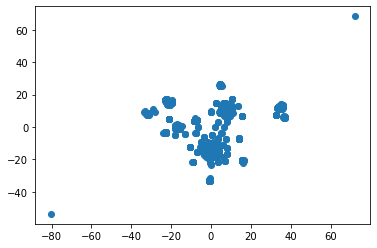

In [32]:
# Create a new dataframe for t-SNE


# Initialize t-SNE model
tsne = TSNE(learning_rate=250)

# Reduce dimensions
tsne_features = tsne.fit_transform(df_scaled_pca)

# The dataset has 2 columns
print(tsne_features.shape)


# Prepare to plot the dataset

# The first column of transformed features
df_scaled_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_scaled_pca['y'] = tsne_features[:,1]


# Visualize the clusters
plt.scatter(df_scaled_pca['x'], df_scaled_pca['y'])
plt.show()

#There are no noticiable clusters in the scatter plot

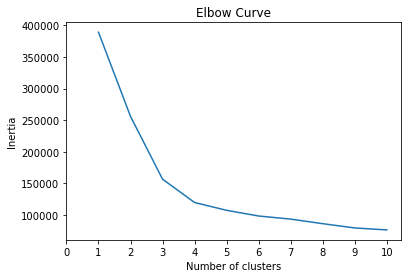

,k,inertia
0,1,389049.209720
1,2,255772.428334
2,3,156439.124840
3,4,119529.893768
4,5,107182.630634


In [33]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_scaled_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
df_elbow.head()

#There is no noticiable elbow in the k-means plot

In [34]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_scaled_pca)

# Predict clusters
predictions = model.predict(df_scaled_pca)

# Add the predicted class column to the dataframe
df_scaled_pca["class"] = model.labels_
df_scaled_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,x,y,class
0,-0.160261,-1.182885,-0.550083,-4.156771e-07,3.813069e-11,2.621114e-10,2.759263e-10,-5.640967e-09,0.015750,-1.162458,...,1.573432e-13,-4.038343e-13,-5.235399e-13,-5.439777e-13,-1.578154e-13,1.389075e-12,3.389163e-14,4.270957,9.409492,2
1,-0.145856,-1.180922,-0.550503,-4.156772e-07,3.813069e-11,2.621115e-10,2.759262e-10,-5.640967e-09,0.014381,-1.164725,...,1.572850e-13,-4.036364e-13,-5.237185e-13,-5.431036e-13,-1.577296e-13,1.389313e-12,3.422201e-14,6.308848,14.723411,2
2,0.406774,-1.934732,-0.622302,-5.916676e-07,5.427810e-11,3.730864e-10,3.927703e-10,-8.029271e-09,-0.029898,-0.753670,...,-1.225533e-14,4.134115e-14,5.925012e-14,4.998731e-14,-5.286933e-14,9.150611e-17,3.952982e-14,5.164763,25.798450,2
3,-0.246677,1.406204,0.188435,2.214784e-07,-2.031958e-11,-1.396617e-10,-1.470235e-10,3.005594e-09,-0.011565,0.155303,...,-6.360315e-15,7.864292e-15,1.377421e-14,-1.588291e-15,-2.712632e-15,3.383737e-15,2.724302e-15,34.430225,11.411498,2
4,-0.318125,1.058161,-0.011589,1.121048e-07,-1.028762e-11,-7.069614e-11,-7.442560e-11,1.521341e-09,0.007188,-0.363163,...,1.564670e-13,-4.034084e-13,-5.238134e-13,-5.393547e-13,-1.614587e-13,1.388519e-12,3.732283e-14,3.642800,-16.535393,1


In [35]:
# I see no way that the cryptocurrencies be clustered together based pn the data provied.